<a href="https://colab.research.google.com/github/ektaarora3501/tensorflow/blob/master/classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
!pip install tensorflow-gpu

     |████████████████████████████████| 377.0MB 37kB/s 


In [5]:
from google.colab import files
uploaded=files.upload()

Saving books.csv to books.csv


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

[4.56 4.49 4.47 4.41 4.55 4.78 4.73 4.38 4.38 4.22 4.22 4.38 4.2  3.88
 4.07 3.9  3.87 3.92 3.94 4.59 4.49 4.49 4.35 4.49 4.53 4.5  4.49 3.89
 3.97 3.87 4.33 4.07 4.17 3.99 4.16 4.43 3.95 4.15 4.24 4.33 4.22 3.91
 4.22 4.22 3.94 4.45 3.98 4.45 3.88 3.9  3.87 4.   3.87 3.92 4.35 4.35
 4.28 4.27 3.89 4.09 4.08 4.04 4.04 4.04 3.89 4.04 4.04 4.04 4.19 3.96
 3.89 4.33 3.94 3.99 4.01 4.01 4.11 4.11 3.94 3.91 4.04 3.94 3.9  4.04
 4.23 4.09 4.04 3.89 4.2  4.19 3.98 3.92 4.08 4.04 4.63 4.06 4.06 4.06
 4.04 4.02 4.24 4.02 4.01 4.01 4.17 3.92 4.07 3.87 3.97 4.06 3.92 3.97
 4.14 3.92 4.21 4.1  4.13 4.53 3.92 3.99 4.12 3.96 4.02 4.06 4.02 3.88]
[3.69 3.43 3.83 3.61 3.7  3.48 3.75 3.6  3.56 3.83 3.83 3.83 3.83 3.83
 3.73 3.83 3.75 3.7  3.28 3.82 3.75 3.83 3.85 3.85 3.31 3.79 3.49 3.5
 3.62 3.52 3.55 3.82 3.65 2.96 3.7  3.82 3.58 3.4  3.57 3.6  3.41 3.69
 3.69 3.82 3.83 3.77 3.77 3.75 3.85 3.67 3.68 3.67 3.83 3.83 3.83 3.83
 3.83 3.83 3.58 3.46 3.78 3.6  3.57 3.78 3.68 3.43 3.42 3.22 3.48 3.64
 3.7  

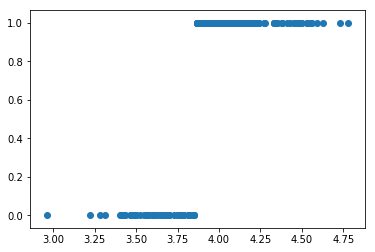

In [120]:
import io
df2=io.BytesIO(uploaded['books.csv'])
rating=(np.array(pd.read_csv(df2,usecols=[3],skiprows=[0],header=None,nrows=7000)))

x_positive=[]
x_negative=[]
#pd.to_numeric(rating)
#print(float(rating[0]),type(rating[0]))
#if(float(rating[0])>4):
 # print('true')

#print(rating)
for i in  range(0,200):
  if float(rating[i])>3.85:
     x_positive=np.append(x_positive,float(rating[i]))
      
  elif float(rating[i])<=3.85:
    
    x_negative=np.append(x_negative,float(rating[i]))

#for i in  range(0,200):
 # if (rating[i]) > 3.8:
  #  x_positive=np.append(x_positive,rating[i])
    
  #elif(rating[i]<3):
   # x_negative=np.append(x_negative,rating[i])
    
print(x_positive)    
print(x_negative)
print(len(x_negative))
print(len(x_positive))
label=np.asarray([1.]*len(x_positive)+[0.]*len(x_negative))
#print(label)
xs=np.append(x_positive,x_negative)
plt.scatter(xs,label)
plt.show()
    
  

w_val [0.02997052 0.15717007]


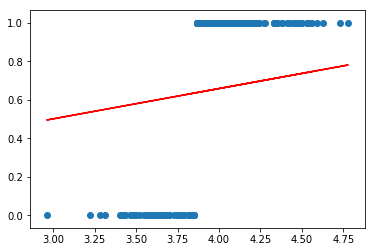

In [125]:
learning_rate=0.001
training_epoch=200
X=tf.placeholder(tf.float32,shape=(None,))
Y=tf.placeholder(tf.float32,shape=(None,))

def model(X,w):
  return tf.add(tf.multiply(w[1],tf.pow(X,1)),tf.multiply(w[0],tf.pow(X,0)))

w=tf.Variable([0.,0.],name="weight")

y_model=model(X,w)

cost=tf.reduce_mean(tf.square(Y-y_model))

train_op=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epoch):
  sess.run(train_op,feed_dict={X:xs,Y:label})
  
w_val=sess.run(w)
print("w_val",w_val)
sess.close()

plt.scatter(xs,label)

all_xs=np.linspace(0,2,2)

plt.plot(xs,xs*w_val[1]+w_val[0],'r')
plt.show()

[0.74798477, -2.3223827]


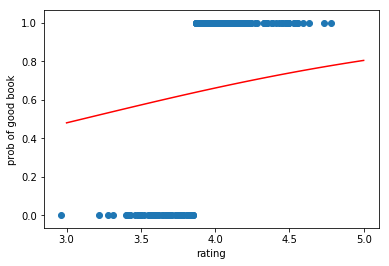

In [150]:
def sigmoid(x):
    return 1./(1.+ np.exp(-x))

learning_rate=0.01
training_epoch=10000

plt.scatter(xs,label)

X=tf.placeholder(tf.float32,shape=(None,),name="x")
Y=tf.placeholder(tf.float32,shape=(None,),name="y")

w=tf.Variable([0.,0.],name="parameter",trainable=True)
y_model=tf.sigmoid(w[1]*X+w[0])

cost=tf.reduce_mean(-Y*tf.log(y_model)-(1-Y)*tf.log(1-y_model))

train_op=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess=tf.Session()

init=tf.global_variables_initializer()

sess.run(init)
prev_error=0

for epoch in range(training_epoch):
    err,_=sess.run([cost,train_op],{X:xs,Y:label})
    #print(epoch,err)
    if(abs(0-err))<0.0001:
        break
    
w_val=sess.run(w,{X:xs,Y:label})
print([w_val[1],w_val[0]])
all_xs=np.linspace(3,5,100)
plt.xlabel("rating")
plt.ylabel("prob of good book")
plt.plot(all_xs,sigmoid((all_xs*w_val[1]+w_val[0])),'r')
plt.show()